In [22]:
import librosa
import numpy as np
import librosa.display
import IPython.display as ipd
from moviepy.editor import *
import cv2
import matplotlib.pyplot as plt

In [23]:
cap = cv2.VideoCapture("news.mp4")

    
length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps    = cap.get(cv2.CAP_PROP_FPS)

In [24]:
(length,width,height,fps)

(4460, 640, 360, 25.0)

In [25]:
frametime = 1/fps
frametime

0.04

In [26]:
audio =  AudioFileClip("news.mp4")

In [27]:
audio.write_audiofile("Audio/test.wav")

MoviePy - Writing audio in Audio/test.wav


MoviePy - Done.


In [28]:
audio, sr = librosa.load("Audio/test.wav")

In [29]:
n_parts = librosa.get_duration(y=audio, sr=sr)/frametime

In [30]:
n_parts

4460.5

In [31]:
splits = np.array_split(audio, n_parts)

In [32]:
mfcc = librosa.feature.mfcc(y=audio, sr=sr)

In [33]:
cepstral_flux = np.diff(mfcc)

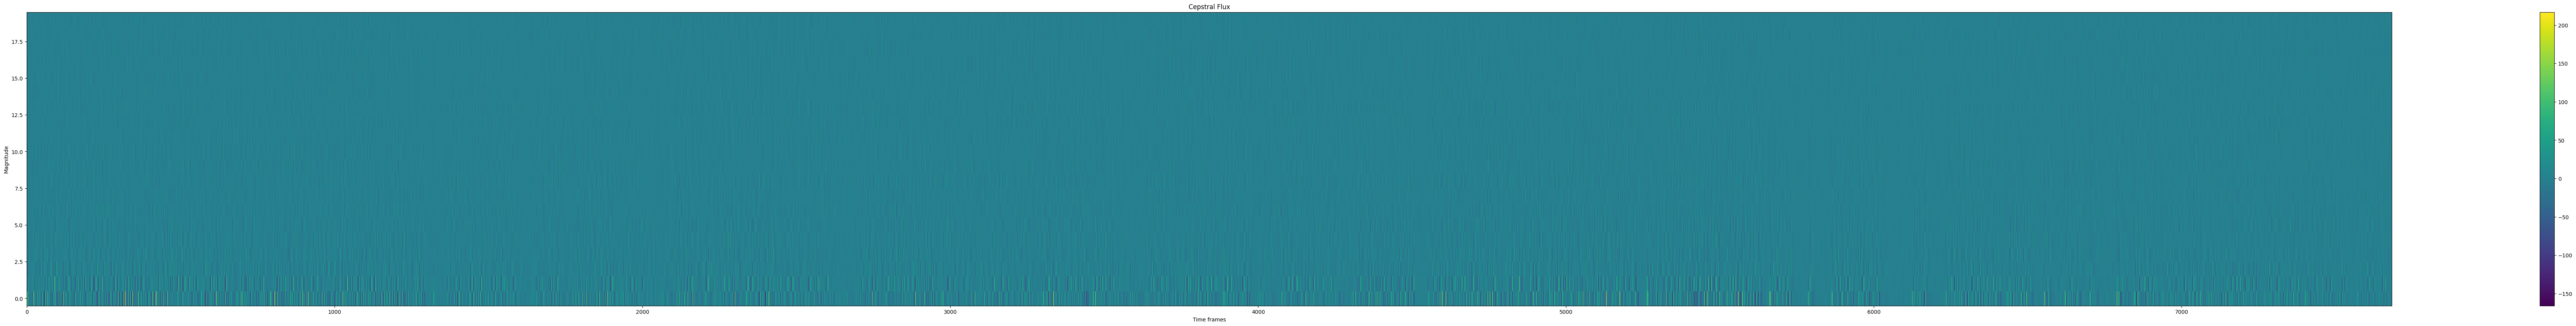

In [34]:


# Assume that the cepstral flux has been calculated and is stored in the variable 'cepstral_flux'

# Plot the cepstral flux
plt.figure(figsize=(100,10))
plt.imshow(cepstral_flux, interpolation='nearest', origin='lower', aspect='auto')
plt.colorbar()
plt.title('Cepstral Flux')
plt.xlabel('Time frames')
plt.ylabel('Magnitude')
plt.show()

In [35]:
tot_samples = len(audio)
tot_samples

3934161

In [36]:
duration = 1 / sr * tot_samples
print(f"The audio lasts for {duration} seconds")

The audio lasts for 178.42000000000002 seconds


In [37]:
duration = 1 / sr * tot_samples
print(f"The audio lasts for {duration} seconds")

The audio lasts for 178.42000000000002 seconds


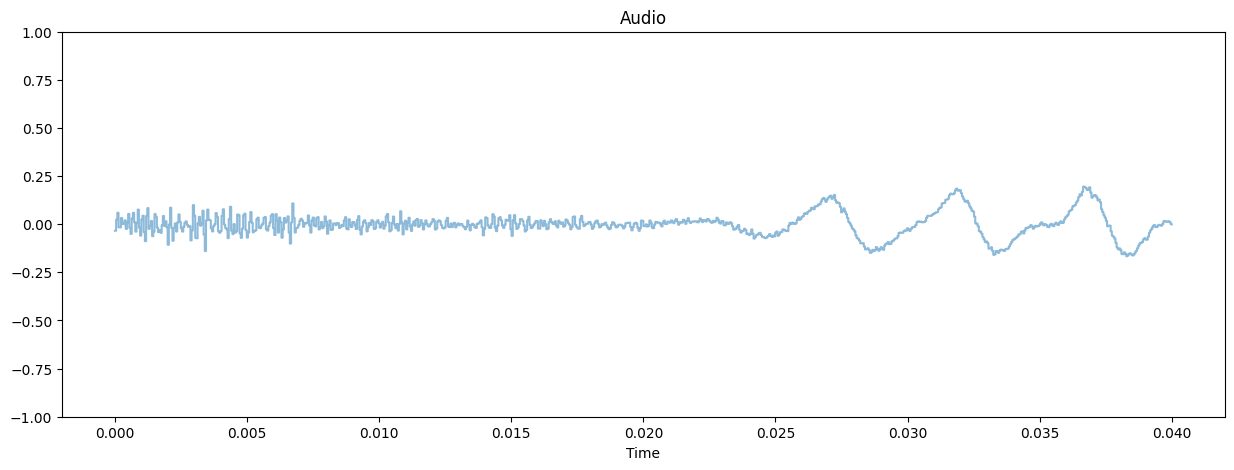

In [41]:
plt.figure(figsize=(15, 17))

plt.subplot(3, 1, 1)
librosa.display.waveshow(splits[102], alpha=0.5)
plt.ylim((-1, 1))
plt.title("Audio")

plt.show()

## AptitudeEnvelope


In [39]:
FRAME_SIZE = 1024
HOP_LENGTH = 512

def amplitude_envelope(signal, frame_size, hop_length):
    """Calculate the amplitude envelope of a signal with a given frame size nad hop length."""
    amplitude_envelope = []
    
    # calculate amplitude envelope for each frame
    for i in range(0, len(signal), hop_length): 
        amplitude_envelope_current_frame = max(signal[i:i+frame_size]) 
        amplitude_envelope.append(amplitude_envelope_current_frame)
    
    return np.array(amplitude_envelope)   

In [28]:
def fancy_amplitude_envelope(signal, frame_size, hop_length):
    """Fancier Python code to calculate the amplitude envelope of a signal with a given frame size."""
    return np.array([max(signal[i:i+frame_size]) for i in range(0, len(signal), hop_length)])

In [29]:
# number of frames in amplitude envelope
ae_audio = amplitude_envelope(audio, FRAME_SIZE, HOP_LENGTH)
len(ae_audio)

9558

In [30]:
frames = range(len(ae_audio))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

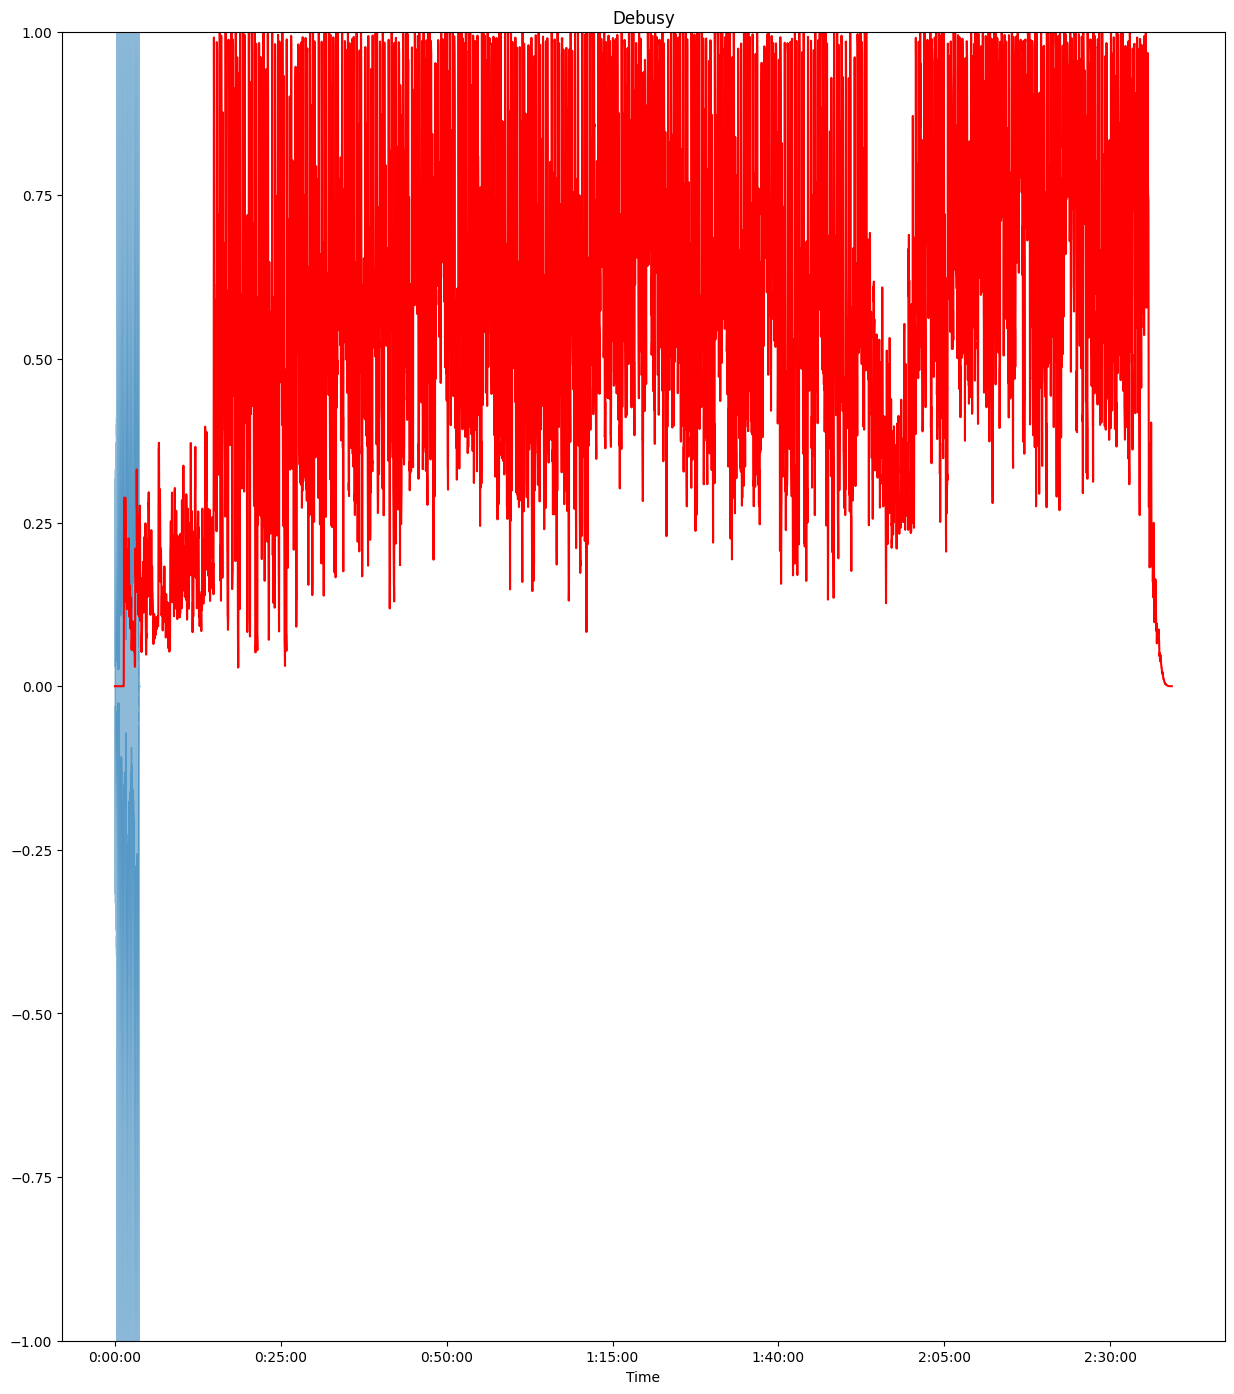

In [39]:
plt.figure(figsize=(15, 17))
librosa.display.waveshow(audio, alpha=1)
plt.plot(ae_audio, color="r")
plt.ylim((-1, 1))
plt.title("Debusy")

plt.show()